In [2]:
import pandas as pd

data = pd.read_csv('mumbai_houses_task_filtred.csv')
data

,price,area,latitude,longitude,bedrooms,bathrooms,balcony,status,neworold,parking,furnished_status,lift,type_of_building
0,22400000,629,19.032800,72.896357,2,2,0,0,1,0,0,0,0
1,35000000,974,19.032800,72.896357,3,2,0,0,1,0,0,0,0
2,31700000,968,19.085600,72.909277,3,3,0,0,1,0,0,0,0
3,18700000,629,19.155756,72.846862,2,2,2,1,1,2,0,2,0
4,13500000,1090,19.177555,72.849887,2,2,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6232,19500000,810,19.138320,72.810020,2,2,0,1,0,0,2,0,0
6233,22000000,1400,19.221920,72.854250,3,3,1,1,0,1,0,1,0
6234,20000000,750,19.144320,72.824111,2,2,0,1,0,0,0,0,0
6235,11000000,700,19.047201,72.872225,2,2,0,1,0,0,1,0,0


# Выделение целевого признака и предикторов

In [3]:
y = data['price']
X = data.drop(['price', 'type_of_building', 'furnished_status', 'status', 'neworold'], axis=1)
y

0       22400000
1       35000000
2       31700000
3       18700000
4       13500000
          ...   
6232    19500000
6233    22000000
6234    20000000
6235    11000000
6236    15000000
Name: price, Length: 6237, dtype: int64

In [4]:
X

,area,latitude,longitude,bedrooms,bathrooms,balcony,parking,lift
0,629,19.032800,72.896357,2,2,0,0,0
1,974,19.032800,72.896357,3,2,0,0,0
2,968,19.085600,72.909277,3,3,0,0,0
3,629,19.155756,72.846862,2,2,2,2,2
4,1090,19.177555,72.849887,2,2,0,0,0
...,...,...,...,...,...,...,...,...
6232,810,19.138320,72.810020,2,2,0,0,0
6233,1400,19.221920,72.854250,3,3,1,1,1
6234,750,19.144320,72.824111,2,2,0,0,0
6235,700,19.047201,72.872225,2,2,0,0,0


# Разбиение на обучающую и тестовую выборки

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4989, 8), (4989,), (1248, 8), (1248,))

# Использование моделей для обучения

In [6]:
# Импорт моделей обучения
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

# Импорт метрик качества
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

In [7]:
# Функция для отображения оценки предсказанных значений относительно реальных
from math import sqrt

def errors(predict_array):
    print(
        f'MAE = {mean_absolute_error(y_true=y_test, y_pred=predict_array)}',
        f'MSE = {mean_squared_error(y_true=y_test, y_pred=predict_array)}',
        f'RMSE = {sqrt(mean_squared_error(y_true=y_test, y_pred=predict_array))}',
        f'MAPE = {mean_absolute_percentage_error(y_true=y_test, y_pred=predict_array)}',
        f'R^2 = {r2_score(y_true=y_test, y_pred=predict_array)}',
        sep='\n'
    )

In [8]:
# Предсказания для тестовой выборки (Линейная регрессия)
lr = LinearRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
errors(y_pred_lr)
lr.coef_

MAE = 8749656.735419402
MSE = 239425065606317.75
RMSE = 15473366.33077359
MAPE = 0.5275100227240483
R^2 = 0.7026326776531258


array([ 2.16349645e+04, -8.28094732e+07, -7.93159767e+07,  9.10817683e+05,
        7.15154157e+06, -1.05992689e+05, -1.05992689e+05, -1.05992689e+05])

In [9]:
# Маштабирование данных

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# L1 модель (Lasso)
lasso = Lasso(alpha=0.5, max_iter=50000).fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
errors(y_pred_lasso)
lasso.coef_

MAE = 8749656.569224289
MSE = 239425064969460.97
RMSE = 15473366.310194463
MAPE = 0.5275100002355817
R^2 = 0.7026326784441055


array([ 1.36241653e+07, -9.13156394e+06, -4.67017404e+06,  6.73003139e+05,
        5.26283256e+06, -4.11334020e+05, -3.05027277e-10, -2.28490445e-10])

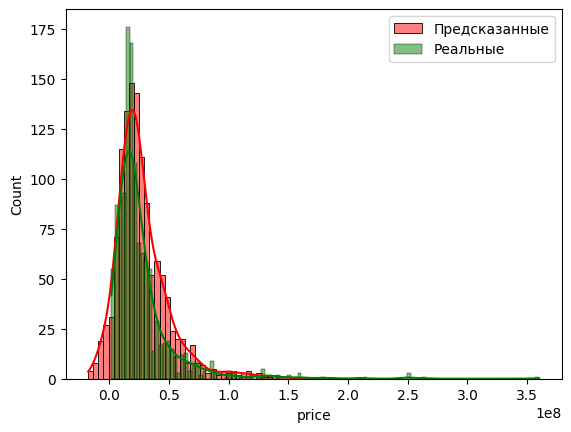

In [11]:
# Визуализация y_true и y_pred_lasso

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(y_pred_lasso, color='red', label='Предсказанные', kde=True)
sns.histplot(y_test, color='green', label='Реальные', kde=True)
plt.legend()
plt.show()

In [12]:
# L2 модель (Ridge)
ridge = Ridge(alpha=0.5, max_iter=50000).fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
errors(y_pred_ridge)
ridge.coef_

MAE = 8749331.300314391
MSE = 239428366004545.78
RMSE = 15473472.97811793
MAPE = 0.5274643491424451
R^2 = 0.7026285785393538


array([13621554.22534637, -9130816.61353033, -4669755.71470331,
         675099.38581092,  5262595.20675106,  -137022.87502695,
        -137022.87502683,  -137022.87502682])

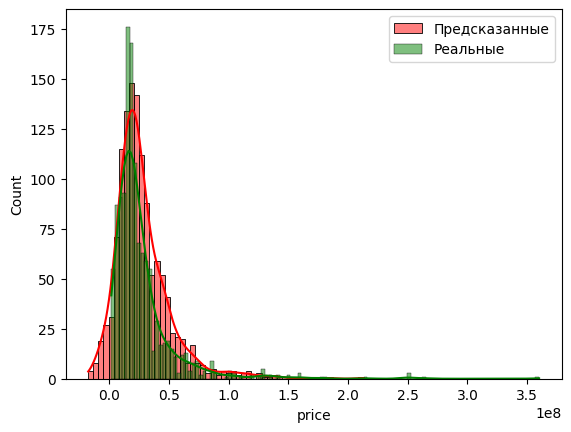

In [13]:
# Визуализация y_true и y_pred_ridge

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(y_pred_ridge, color='red', label='Предсказанные', kde=True)
sns.histplot(y_test, color='green', label='Реальные', kde=True)
plt.legend()
plt.show()

In [14]:
# Elastic Net (комбинация L1 и L2)
el = ElasticNet(alpha=0.5, max_iter=50000).fit(X_train, y_train)
y_pred_el = el.predict(X_test)
errors(y_pred_el)
el.coef_

MAE = 10146107.29898217
MSE = 314413976723816.44
RMSE = 17731722.328183927
MAPE = 0.6038272494735774
R^2 = 0.6094960144209451


array([   26299.42214078, -3622597.44978896, -1008231.091384  ,
        1691481.83450225,  4477395.7093688 ,  -452388.85891585,
        -452388.85777464,  -452388.85870924])

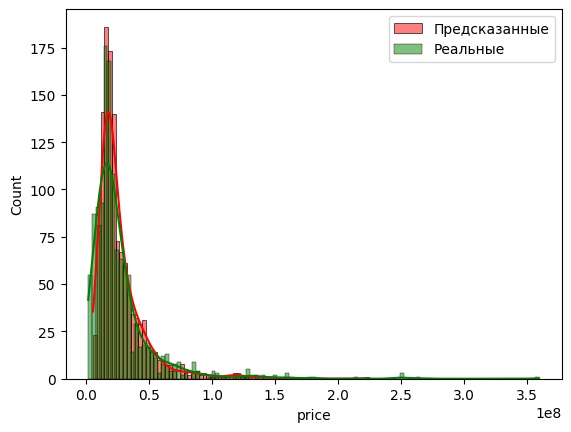

In [15]:
# Визуализация y_true и y_pred_el

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(y_pred_el, color='red', label='Предсказанные', kde=True)
sns.histplot(y_test, color='green', label='Реальные', kde=True)
plt.legend()
plt.show()

In [16]:
# Полиномиальная регрессия

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_p = poly.fit_transform(X_train_scaled)
X_test_p = poly.transform(X_test_scaled)
lr2 = LinearRegression().fit(X_train_p, y_train)
y_pred_p = lr2.predict(X_test_p)
errors(y_pred_p)
lr2.coef_

MAE = 7484502.088830593
MSE = 184906447749654.94
RMSE = 13598031.024734976
MAPE = 0.40397880199778047
R^2 = 0.770345117739685


array([ 9541180.05721164, -8646813.76959704, -6943848.09035527,
        2277956.65272575,  2517068.56134653,   168880.08297545,
         168880.08297545,   168880.08297544,  -582130.9744703 ,
       -4935826.06146124, -3344186.11717744,  1395652.31934547,
         754119.41168982,    57046.89101214,    57046.89101214,
          57046.89101214,   284304.21428505,  3113896.09909965,
        -127518.29744052, -2165684.42858432,   120904.53608583,
         120904.53608583,   120904.53608583,   568828.50292499,
         771816.45841117, -1137807.00496965,   -15387.65740361,
         -15387.65740361,   -15387.65740361,  -545533.74277074,
         756235.04697788,   351788.00388695,   351788.00388695,
         351788.00388695,  -345887.04746593,  -156011.65226494,
        -156011.65226494,  -156011.65226494,  -130996.12537023,
        -130996.12537023,  -130996.12537023,  -130996.12537023,
        -130996.12537022,  -130996.12537023])

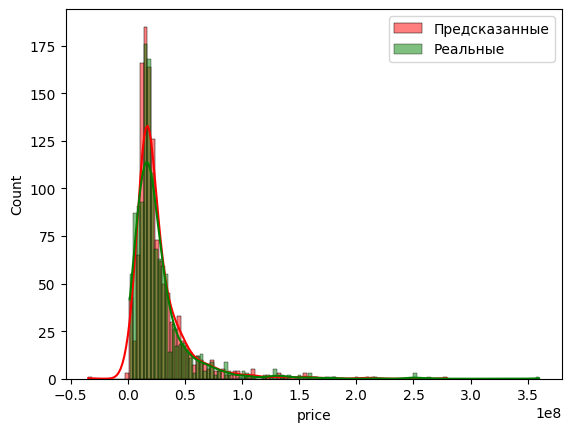

In [17]:
# Визуализация y_true и y_pred_p

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(y_pred_p, color='red', label='Предсказанные', kde=True)
sns.histplot(y_test, color='green', label='Реальные', kde=True)
plt.legend()
plt.show()

# Поиск оптимального гиперпараметра для моделей 

In [18]:
# Импорт методов для подбора гиперпараметра
from hyperparameter_search import hyperparameter_search
import numpy as np

In [19]:
from hyperparameter_search import hyperparameter_search

models, methods = ('lasso', 'ridge', 'elasticnet'), ('GridSearchCV', 'RandomizedSearchCV')
parameters = {
    'lasso': {'alpha': np.arange(0.1, 10.1, 0.1)},
    'ridge': {'alpha': np.arange(0.1, 10.1, 0.1)},
    'elasticnet': {'alpha': np.arange(0.1, 10.1, 0.1), 'l1_ratio': np.arange(0.1, 1.1, 0.1)}
}

best_parameters = {}

for model in models:
    for method in methods:
        best_parameter = hyperparameter_search(model_name=model, method_search=method, parameters=parameters[model], X_train=X_train_scaled, y_train=y_train)
        best_parameters[f'{model}_{method}'] = best_parameter
        print(f'Лучший параметр для {model.capitalize()} методом {method}: {best_parameter}')

Лучший параметр для Lasso методом GridSearchCV: {'alpha': np.float64(6.7)}
Лучший параметр для Lasso методом RandomizedSearchCV: {'alpha': np.float64(9.4)}
Лучший параметр для Ridge методом GridSearchCV: {'alpha': np.float64(10.0)}
Лучший параметр для Ridge методом RandomizedSearchCV: {'alpha': np.float64(9.8)}
Лучший параметр для Elasticnet методом GridSearchCV: {'alpha': np.float64(0.1), 'l1_ratio': np.float64(0.8)}
Лучший параметр для Elasticnet методом RandomizedSearchCV: {'l1_ratio': np.float64(1.0), 'alpha': np.float64(10.0)}


In [20]:
# Optuna

from optuna_best_params import optuna

for model in models:
    best_parameter = optuna(model, X_train=X_train_scaled, y_train=y_train, X_test=X_test_scaled, y_test=y_test)
    best_parameters[f'{model}_optuna'] = best_parameter
    print(f'Лучший параметр для {model.capitalize()} методом optuna: {best_parameter}')

c:\Users\motyn\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-03-17 15:21:05,996] A new study created in memory with name: no-name-40968895-a6e1-4aa8-b7b2-e405ff5d1deb
[I 2025-03-17 15:21:06,000] Trial 0 finished with value: 239424977421766.06 and parameters: {'alpha': 21.31019553660136}. Best is trial 0 with value: 239424977421766.06.
[I 2025-03-17 15:21:06,004] Trial 1 finished with value: 239425046992378.3 and parameters: {'alpha': 3.0461039680973734}. Best is trial 0 with value: 239424977421766.06.
[I 2025-03-17 15:21:06,009] Trial 2 finished with value: 239424853750033.66 and parameters: {'alpha': 51.26625486256513}. Best is trial 2 with value: 239424853750033.66.
[I 2025-03-17 15:21:06,014] Trial 3 finished with value: 239425049326834.88 and parameters: {'alph

Лучший параметр для Lasso методом optuna: 99.99843195037077


[I 2025-03-17 15:21:06,987] Trial 28 finished with value: 239567570589363.2 and parameters: {'alpha': 20.80721878265394}. Best is trial 10 with value: 239426109773150.78.
[I 2025-03-17 15:21:06,999] Trial 29 finished with value: 239692884036789.66 and parameters: {'alpha': 37.992531546477224}. Best is trial 10 with value: 239426109773150.78.
[I 2025-03-17 15:21:07,010] Trial 30 finished with value: 239783646264963.66 and parameters: {'alpha': 49.917461904931024}. Best is trial 10 with value: 239426109773150.78.
[I 2025-03-17 15:21:07,021] Trial 31 finished with value: 239428981625726.56 and parameters: {'alpha': 0.5931598372739556}. Best is trial 10 with value: 239426109773150.78.
[I 2025-03-17 15:21:07,032] Trial 32 finished with value: 239426394962110.66 and parameters: {'alpha': 0.2015074193550217}. Best is trial 10 with value: 239426109773150.78.
[I 2025-03-17 15:21:07,041] Trial 33 finished with value: 239470014617367.78 and parameters: {'alpha': 6.730674280242609}. Best is trial 

Лучший параметр для Ridge методом optuna: 0.001542981675332955


[I 2025-03-17 15:21:07,783] Trial 20 finished with value: 772123364339643.1 and parameters: {'alpha': 99.8612452010019, 'l1_ratio': 0.23281056139066836}. Best is trial 13 with value: 239471020254313.5.
[I 2025-03-17 15:21:07,795] Trial 21 finished with value: 294135590414555.6 and parameters: {'alpha': 2.4748008245293383, 'l1_ratio': 0.6876699307874495}. Best is trial 13 with value: 239471020254313.5.
[I 2025-03-17 15:21:07,815] Trial 22 finished with value: 446366244494814.56 and parameters: {'alpha': 15.567589085790603, 'l1_ratio': 0.7904038138495253}. Best is trial 13 with value: 239471020254313.5.
[I 2025-03-17 15:21:07,835] Trial 23 finished with value: 612059533950466.2 and parameters: {'alpha': 19.72841632000493, 'l1_ratio': 0.5046606744182862}. Best is trial 13 with value: 239471020254313.5.
[I 2025-03-17 15:21:07,850] Trial 24 finished with value: 413523007713532.44 and parameters: {'alpha': 7.301942496584914, 'l1_ratio': 0.6440283008063638}. Best is trial 13 with value: 23947

Лучший параметр для Elasticnet методом optuna: (0.004230550019474366, 0.6745641827044311)


In [21]:
print(best_parameters)

{'lasso_GridSearchCV': {'alpha': np.float64(6.7)}, 'lasso_RandomizedSearchCV': {'alpha': np.float64(9.4)}, 'ridge_GridSearchCV': {'alpha': np.float64(10.0)}, 'ridge_RandomizedSearchCV': {'alpha': np.float64(9.8)}, 'elasticnet_GridSearchCV': {'alpha': np.float64(0.1), 'l1_ratio': np.float64(0.8)}, 'elasticnet_RandomizedSearchCV': {'l1_ratio': np.float64(1.0), 'alpha': np.float64(10.0)}, 'lasso_optuna': 99.99843195037077, 'ridge_optuna': 0.001542981675332955, 'elasticnet_optuna': (0.004230550019474366, 0.6745641827044311)}
